In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Conexión a la base de datos
engine = create_engine('sqlite:///../data/processed/sales.db')

# Consulta de datos
df = pd.read_sql('SELECT * FROM sales', con=engine)

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00.000000,0.85,12680,France,10.20
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00.000000,2.10,12680,France,12.60
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00.000000,4.15,12680,France,16.60
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00.000000,4.15,12680,France,16.60


In [4]:
# Análisis: Ventas totales por país
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

sales_by_country

Country
United Kingdom          6747156.154
Netherlands              284661.540
EIRE                     250001.780
Germany                  221509.470
France                   196626.050
Australia                137009.770
Switzerland               55739.400
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  28995.760
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6988.400
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2660.770
Malta                      2505.470
United Arab Emirates

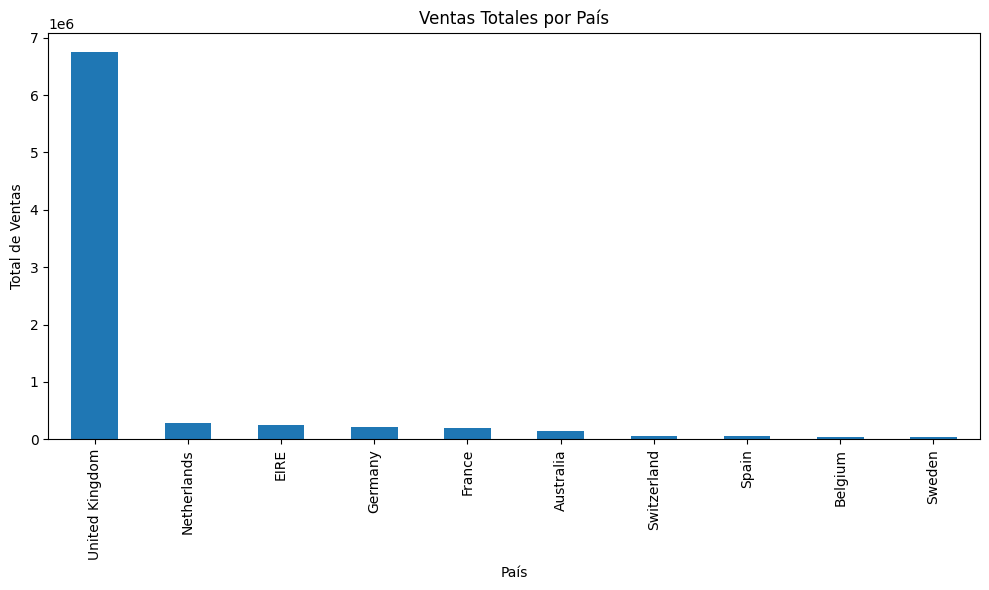

In [6]:
# Visualización
plt.figure(figsize=(10,6))
sales_by_country.head(10).plot(kind='bar')
plt.title('Ventas Totales por País')
plt.xlabel('País')
plt.ylabel('Total de Ventas')
plt.tight_layout()
plt.savefig('../images/sales_by_country.png')
plt.show()